In [1]:
import numpy as np
import pickle as pkl
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from math import floor, ceil

In [2]:
feature_before = np.random.rand(50,70,1024)
feature_after = np.random.rand(50,70,1024)

In [3]:
def get_max_and_concat(before_large, after_large, size=1024):
    final = np.zeros(1024*2)
    for i in range(1024):
        final[i] = np.max(before_large[:,:,i])
    for i in range(1024):
        final[i+size] = np.max(after_large[:,:,i])
    
    return final
        

In [4]:
final = get_max_and_concat(feature_before, feature_after)

In [5]:
final.shape

(2048,)

In [6]:
SESSIONS_PATH = "/home/wc-gpu/MasterThesis/session_data"
IMAGE_SIZE = (30, 20)
plot_features_and_annotations = True

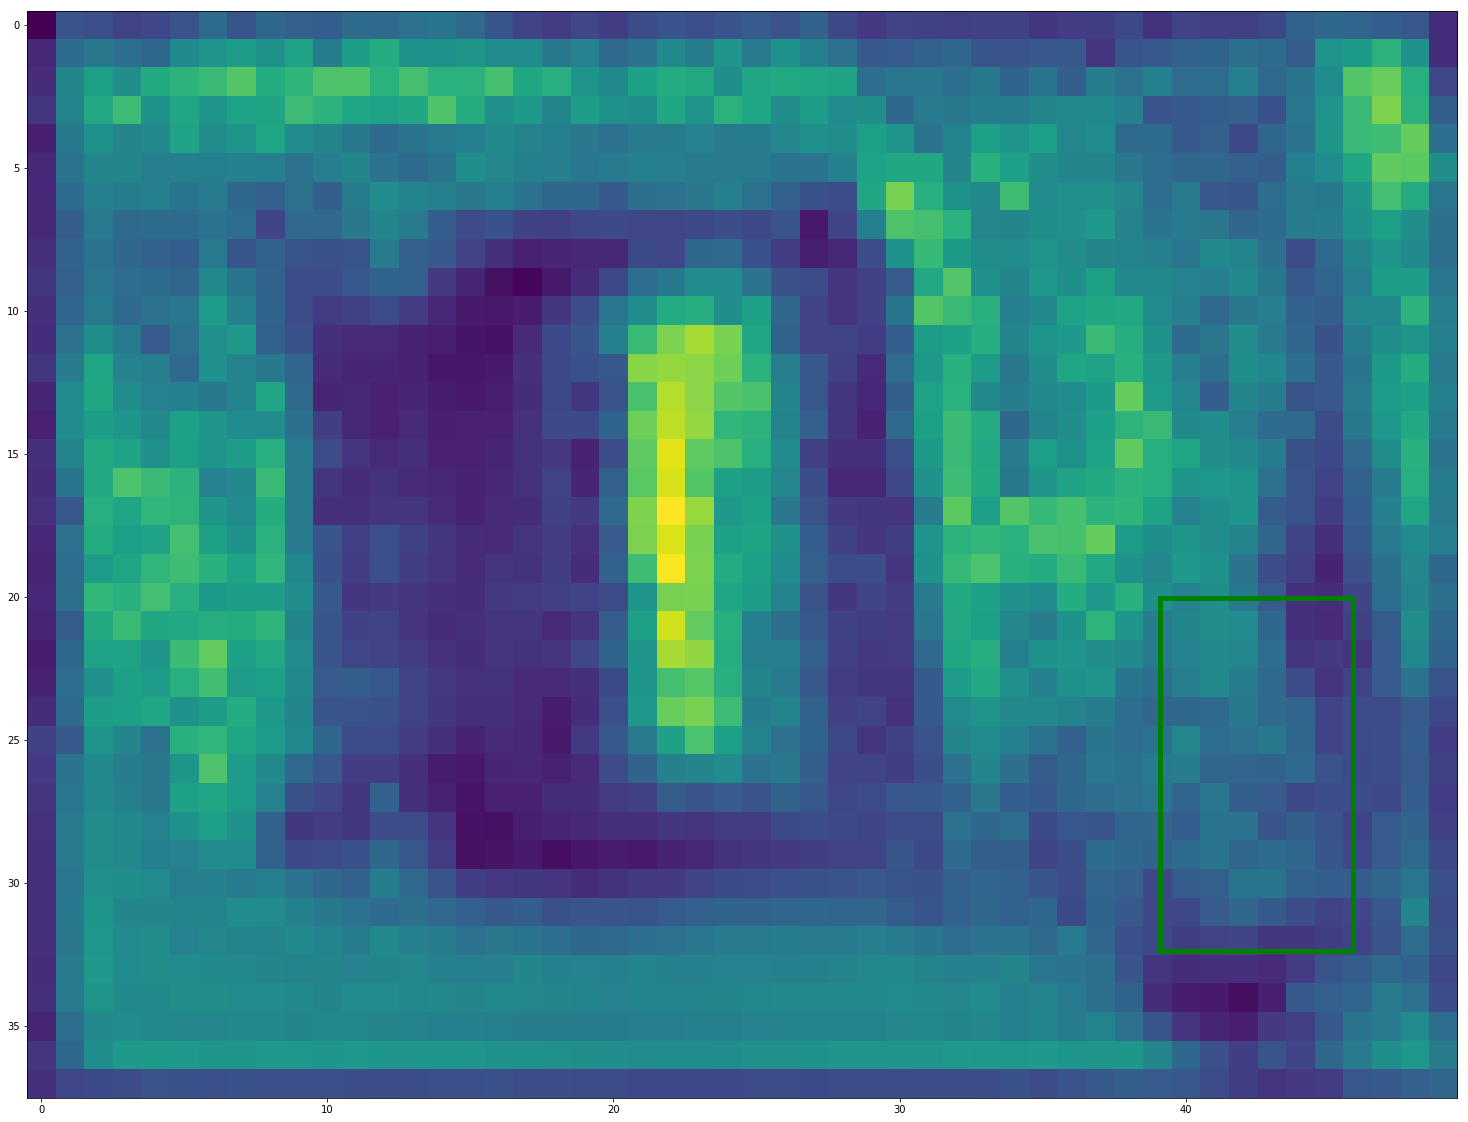

negatives
positives


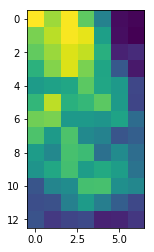

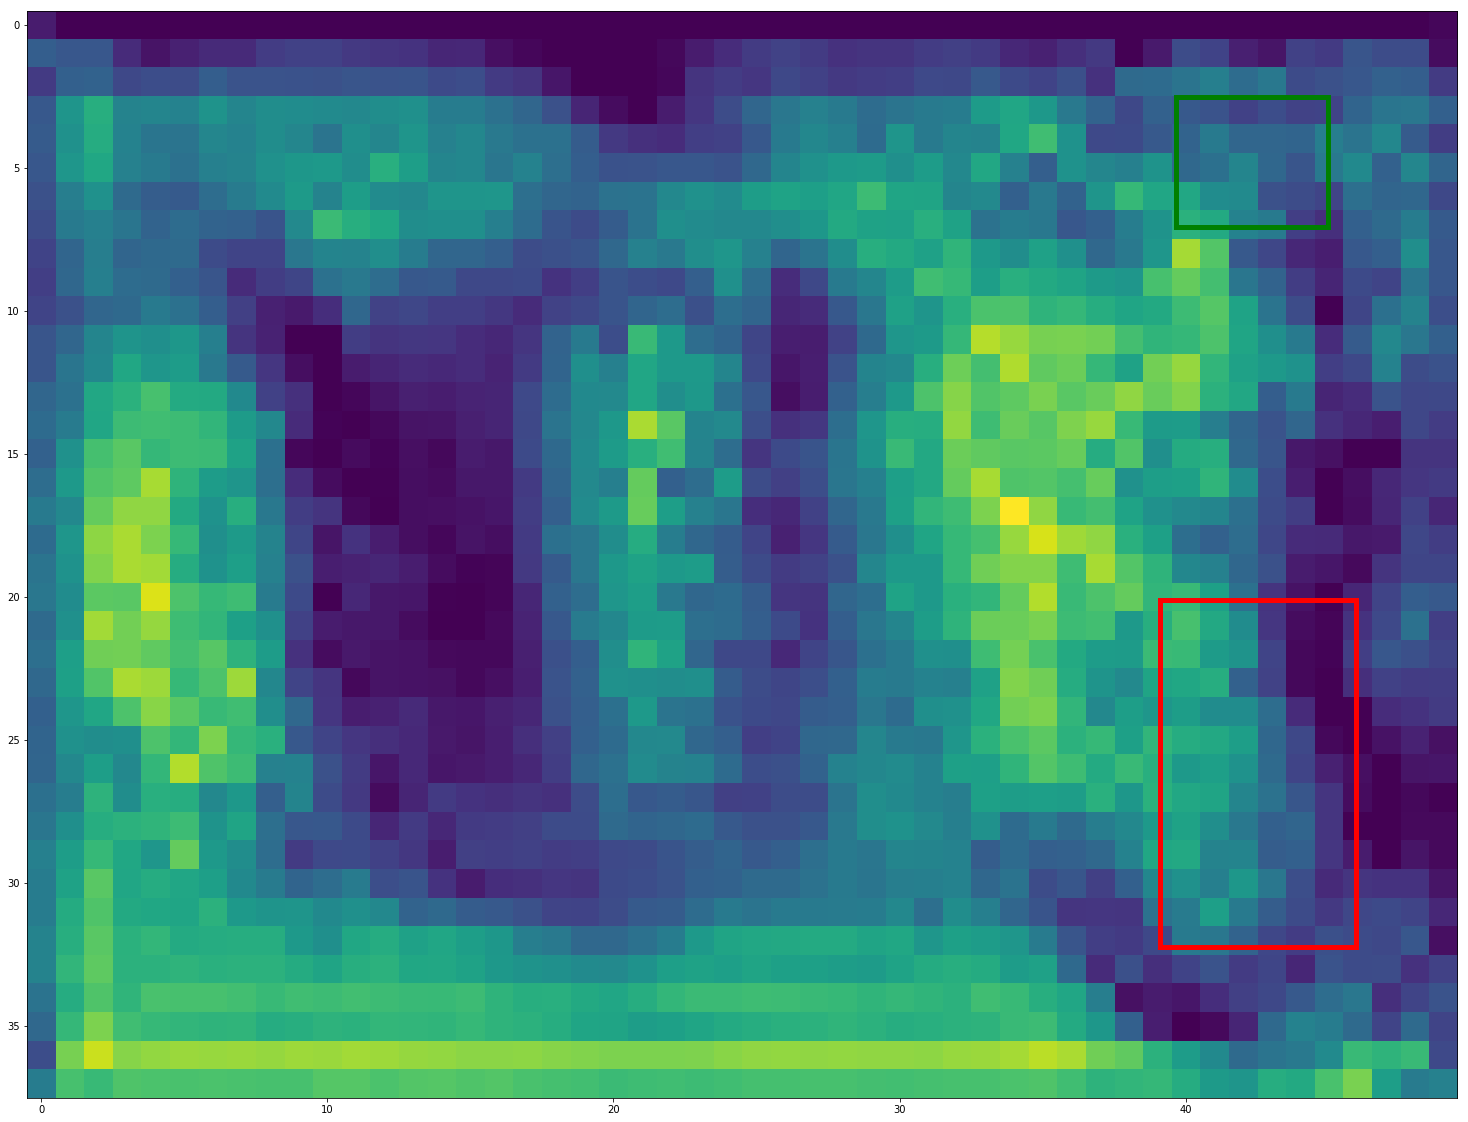

negatives


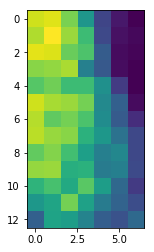

positives


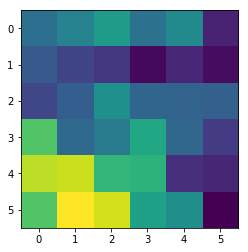

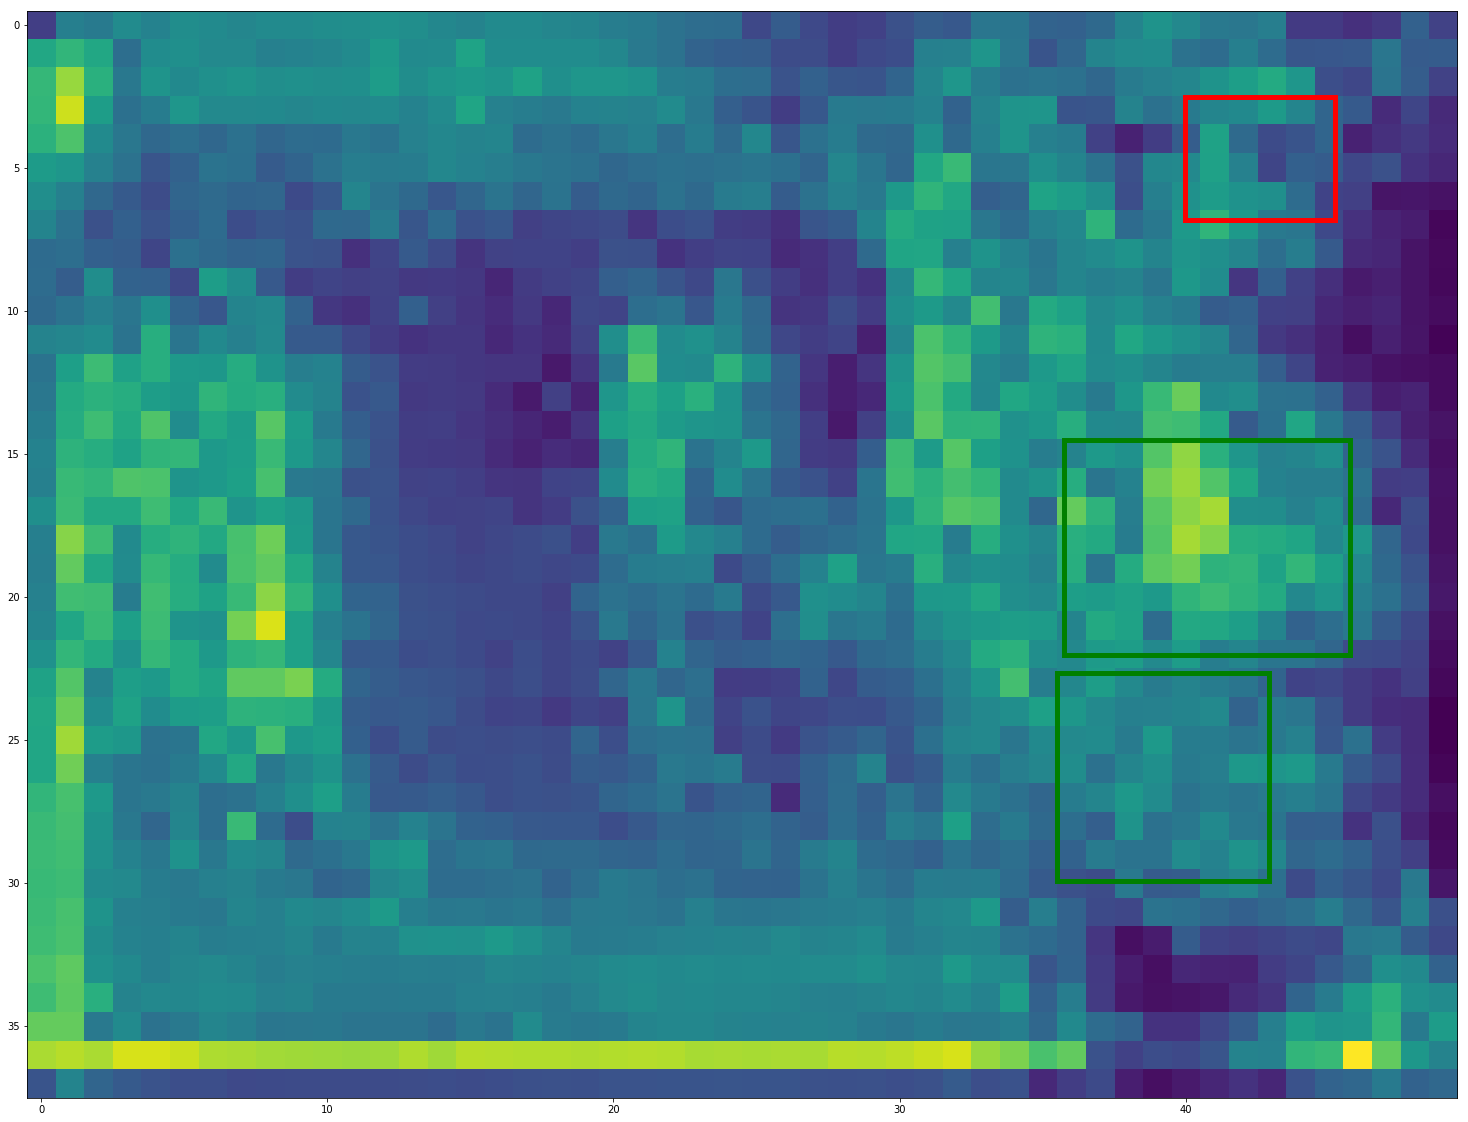

negatives


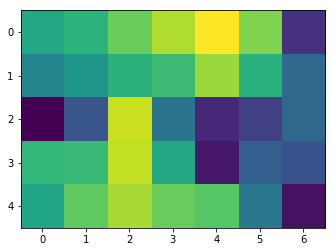

positives


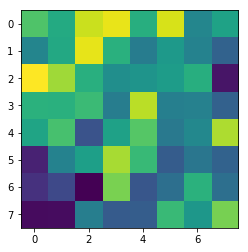

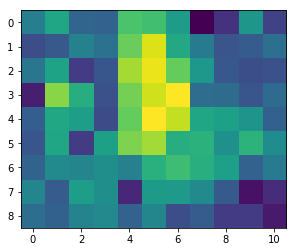

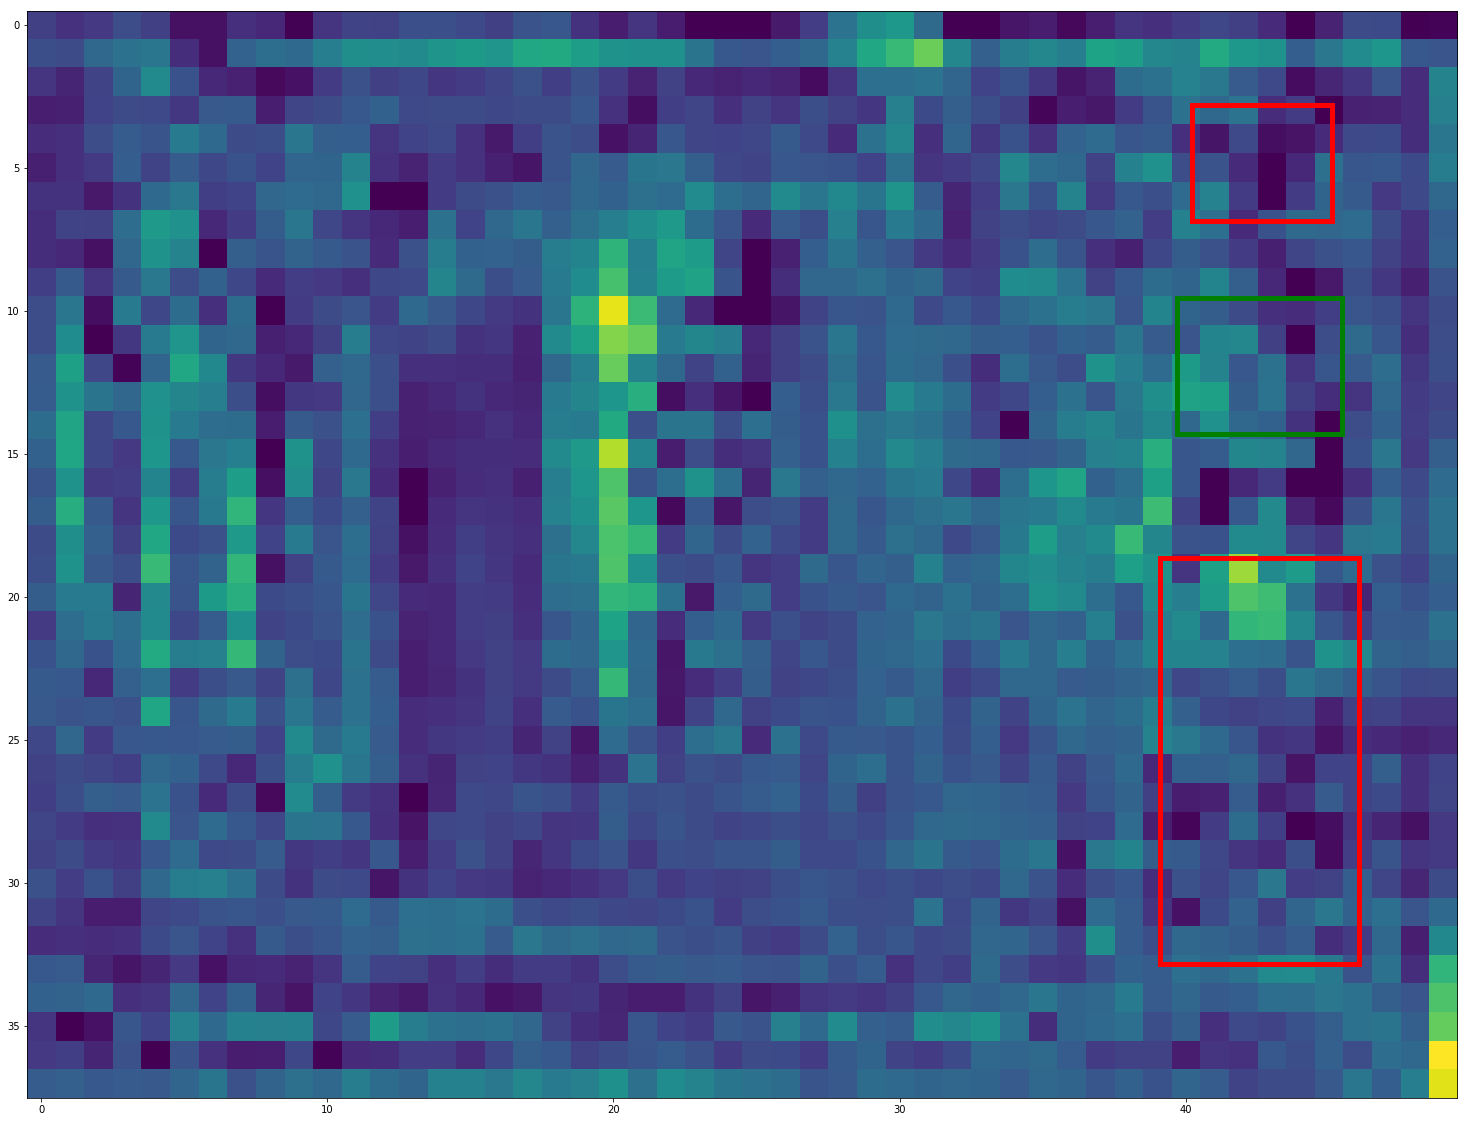

negatives


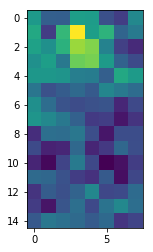

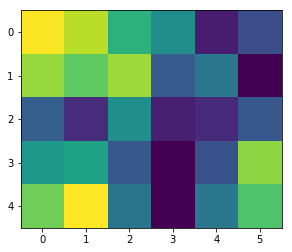

positives


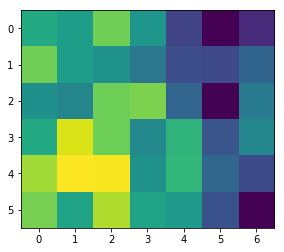

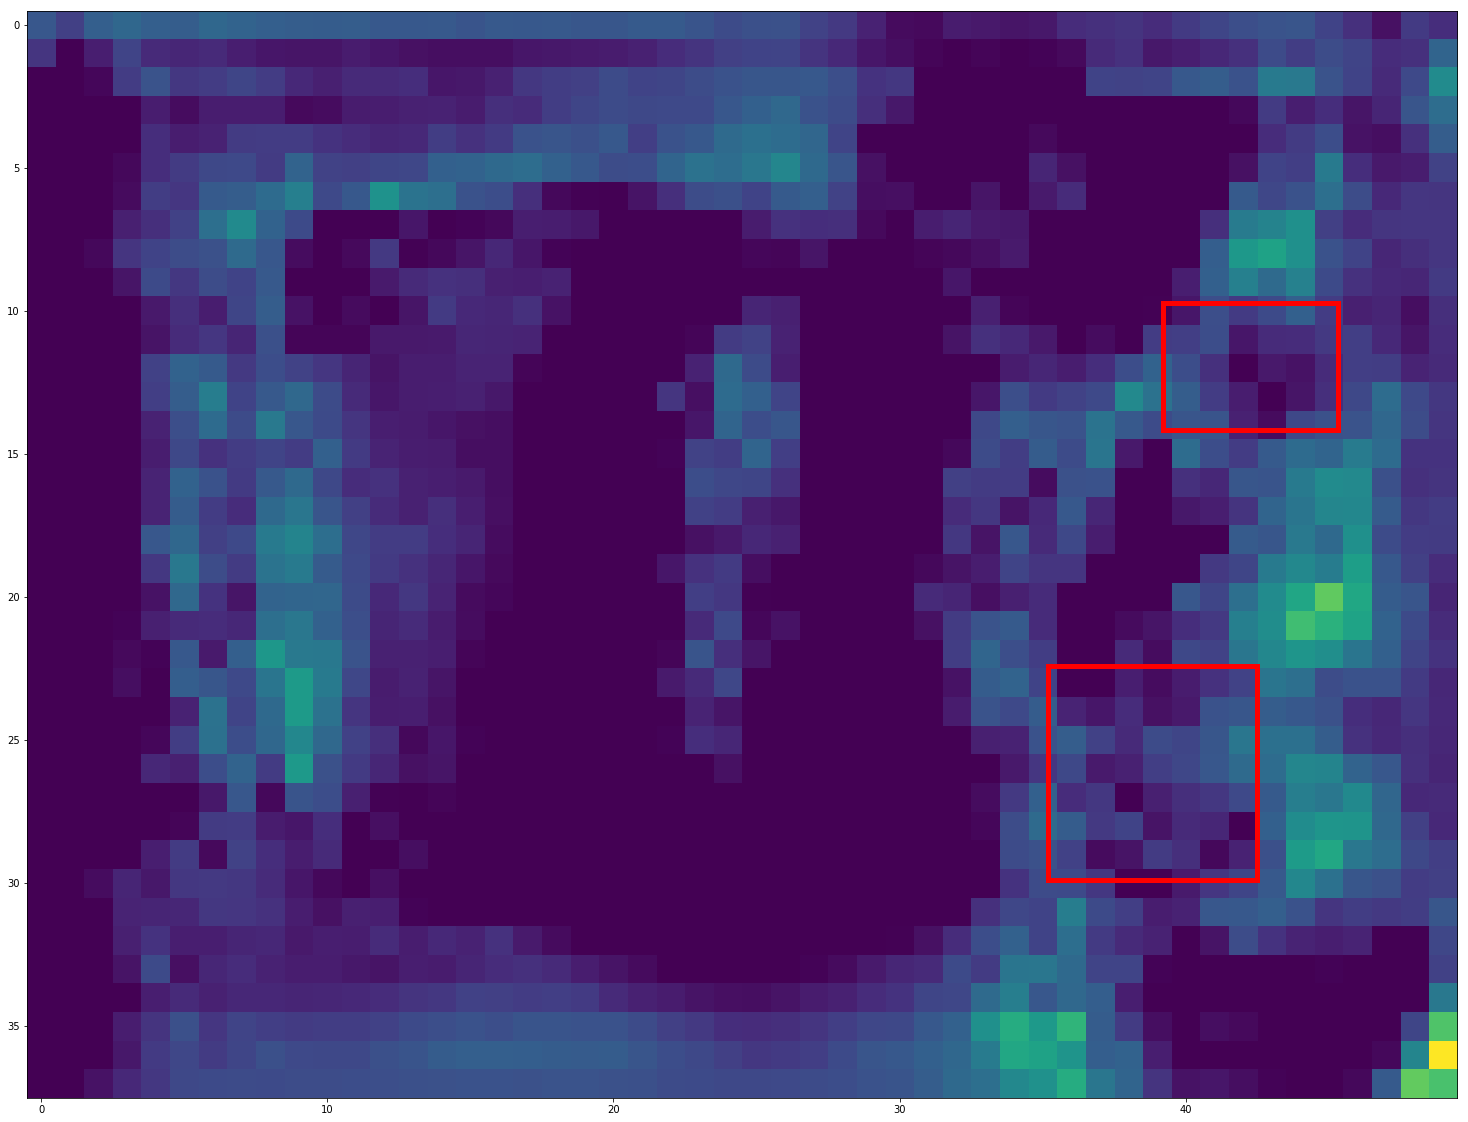

negatives


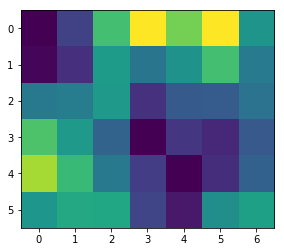

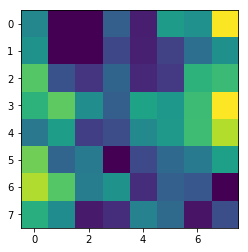

positives


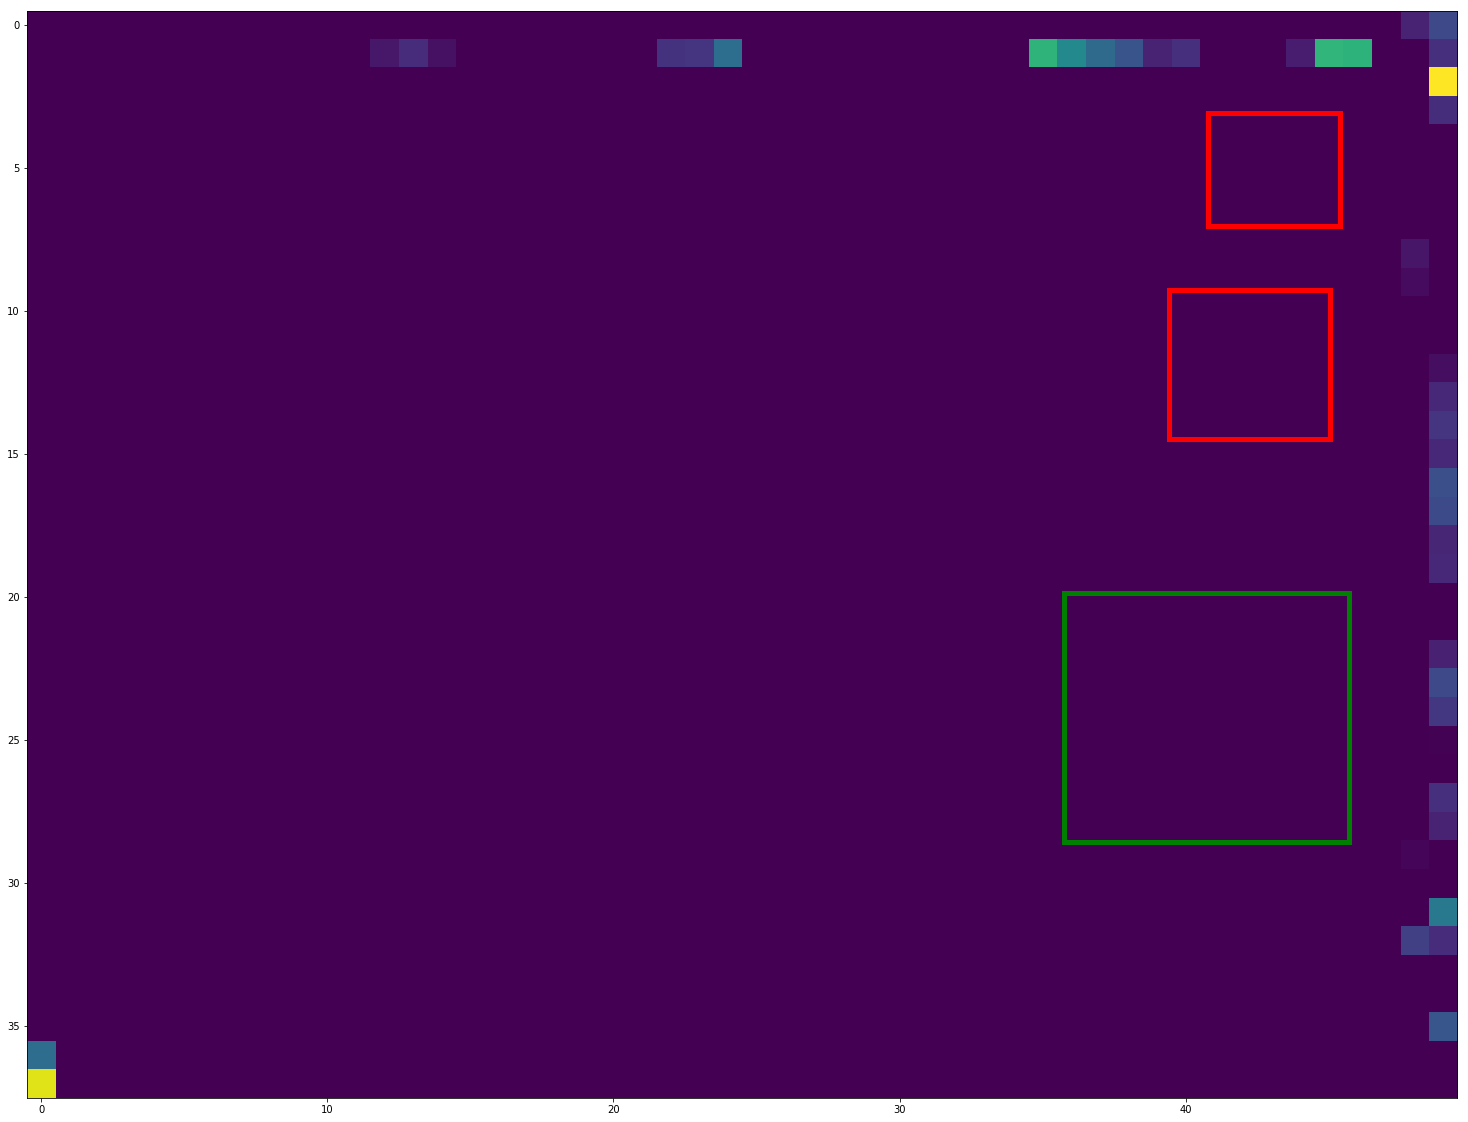

negatives


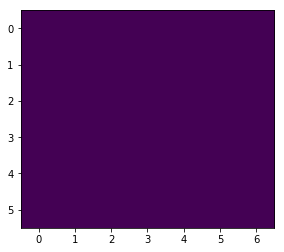

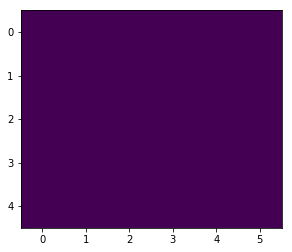

positives


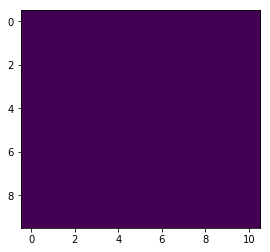

/home/wc-gpu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/wc-gpu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/home/wc-gpu/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/wc-gpu/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


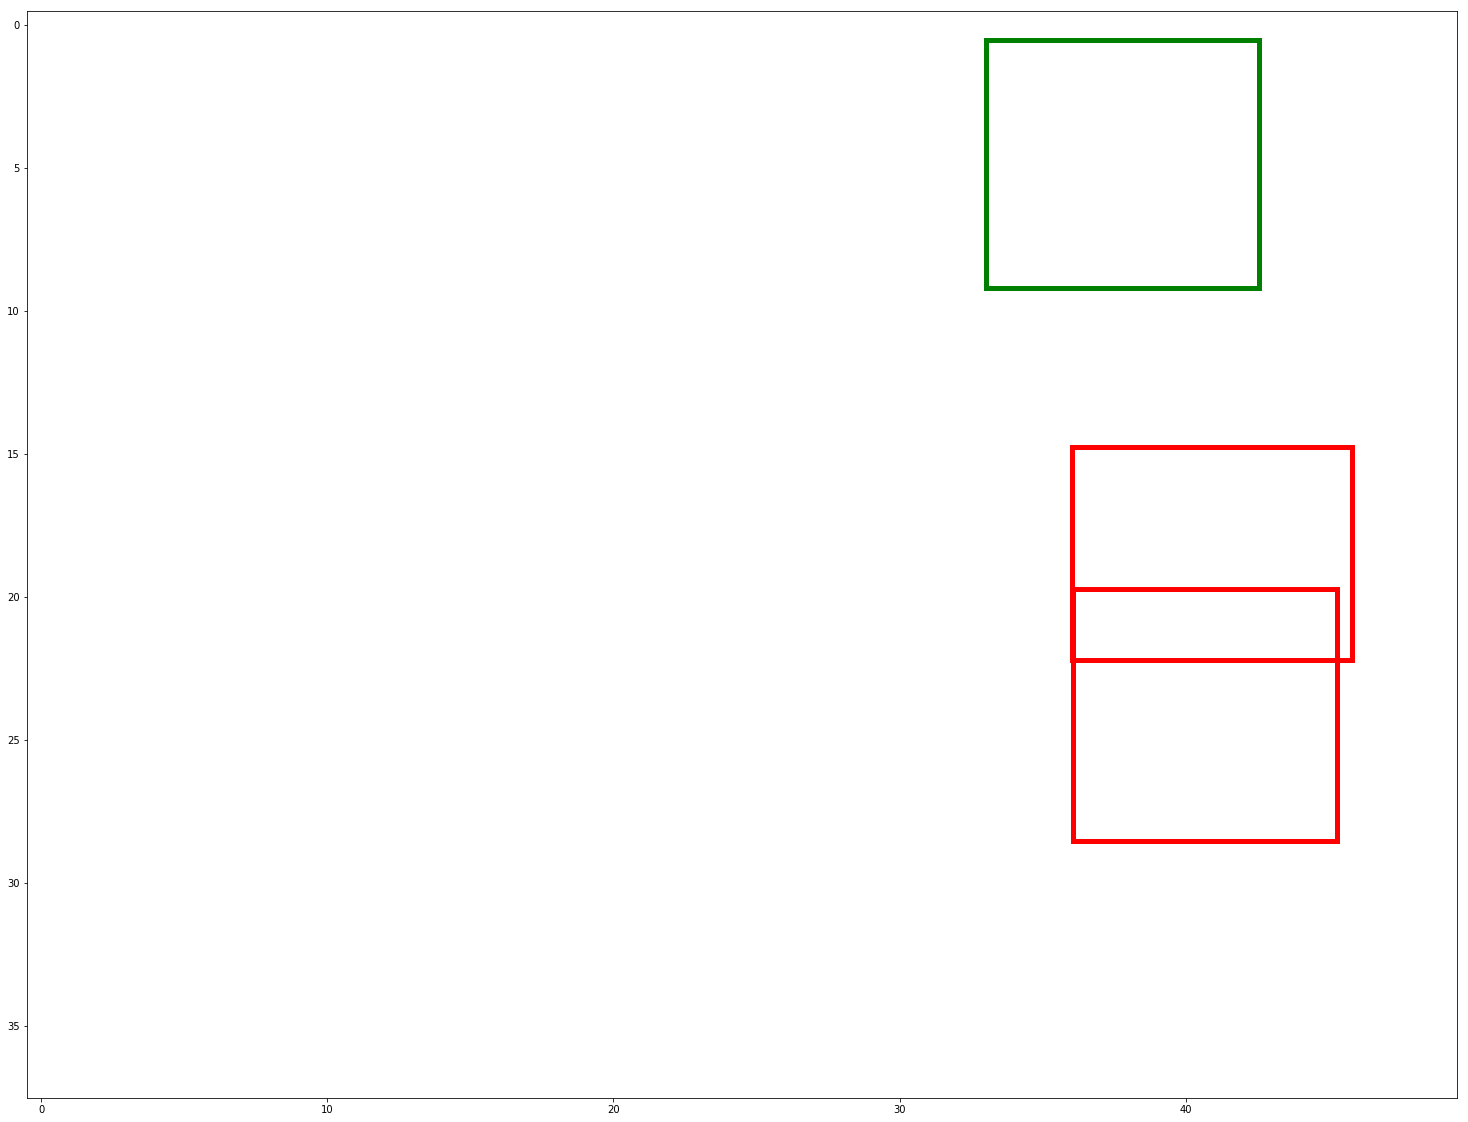

negatives


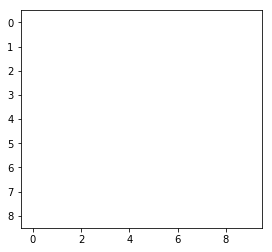

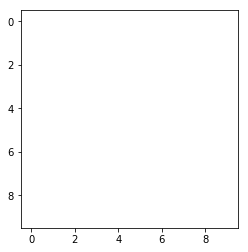

positives


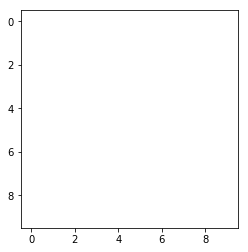

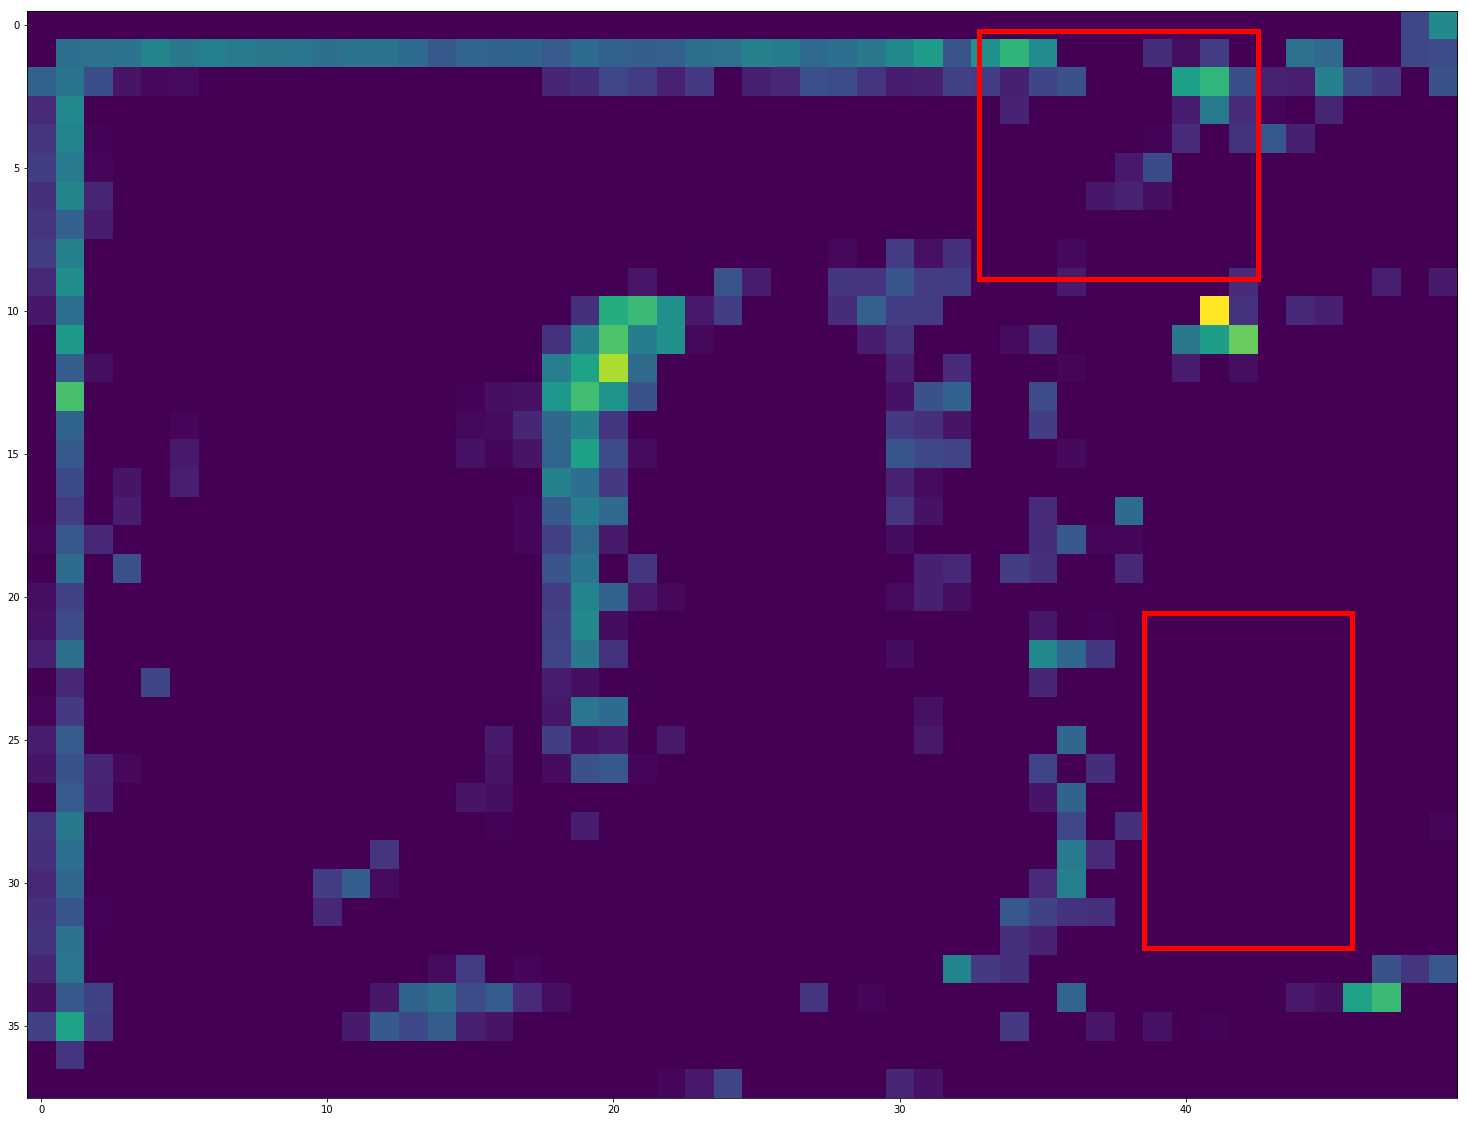

negatives


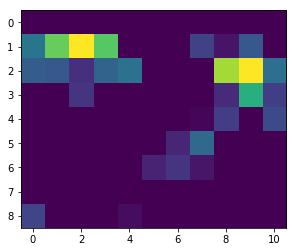

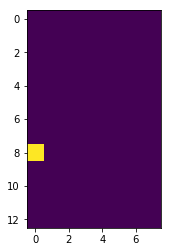

positives


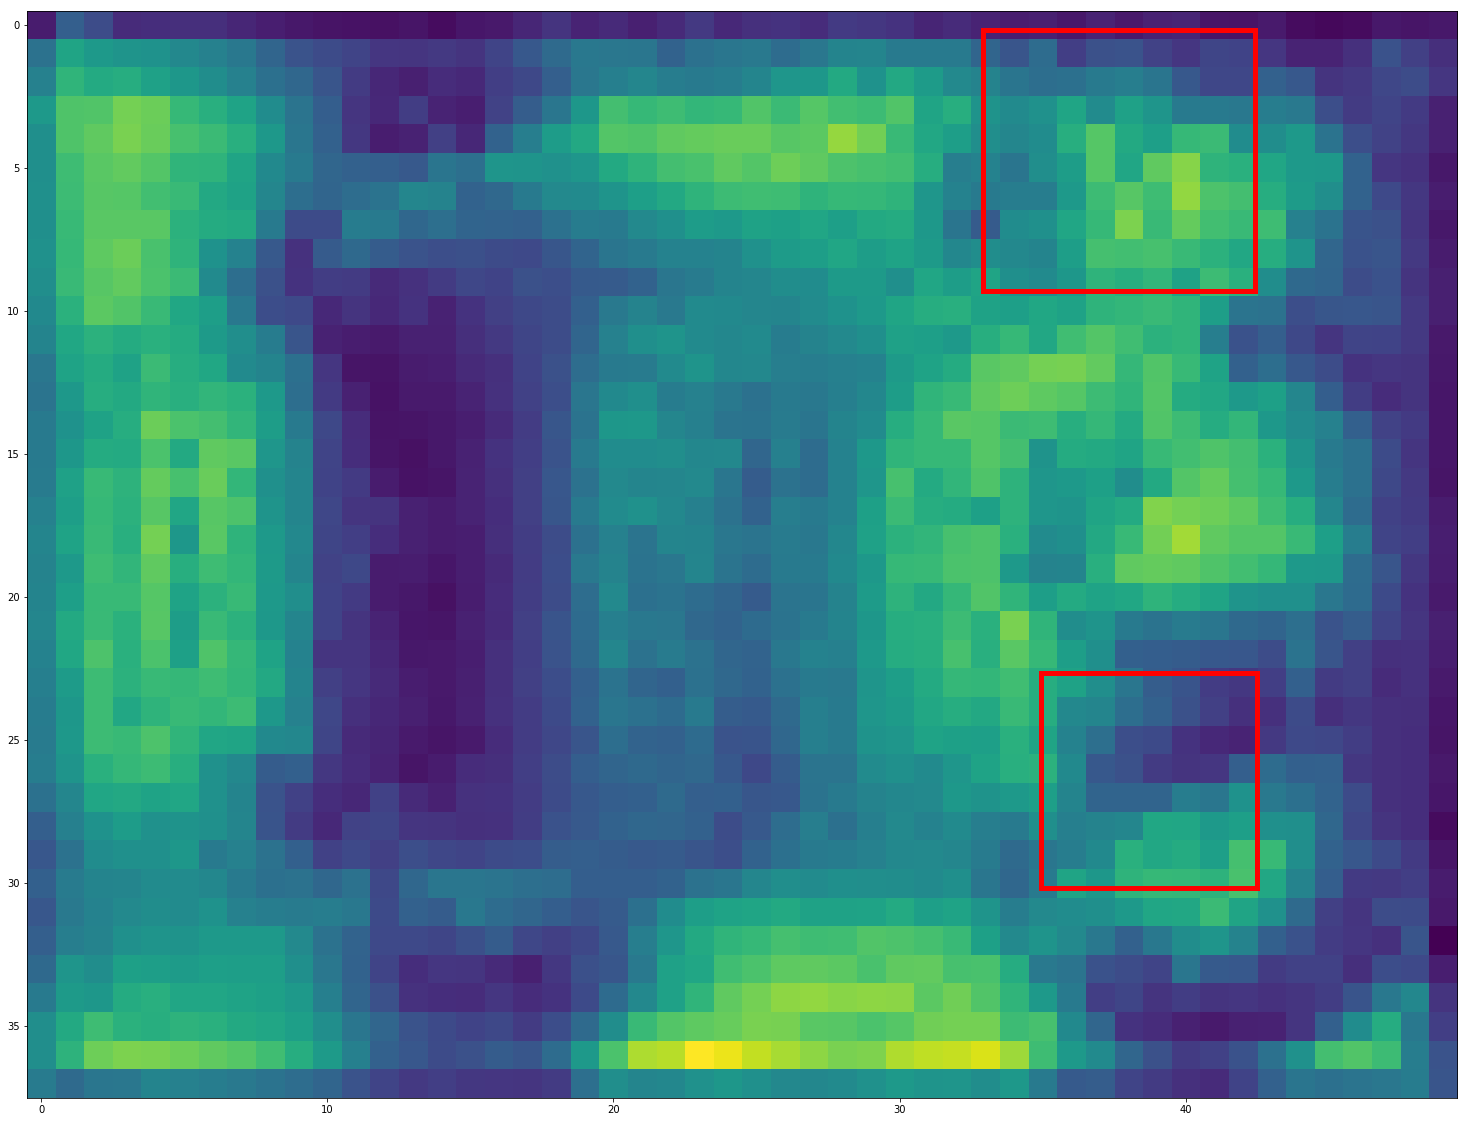

negatives


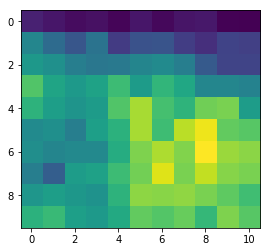

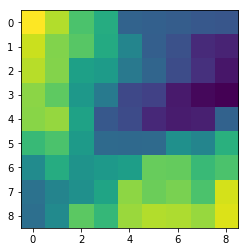

positives


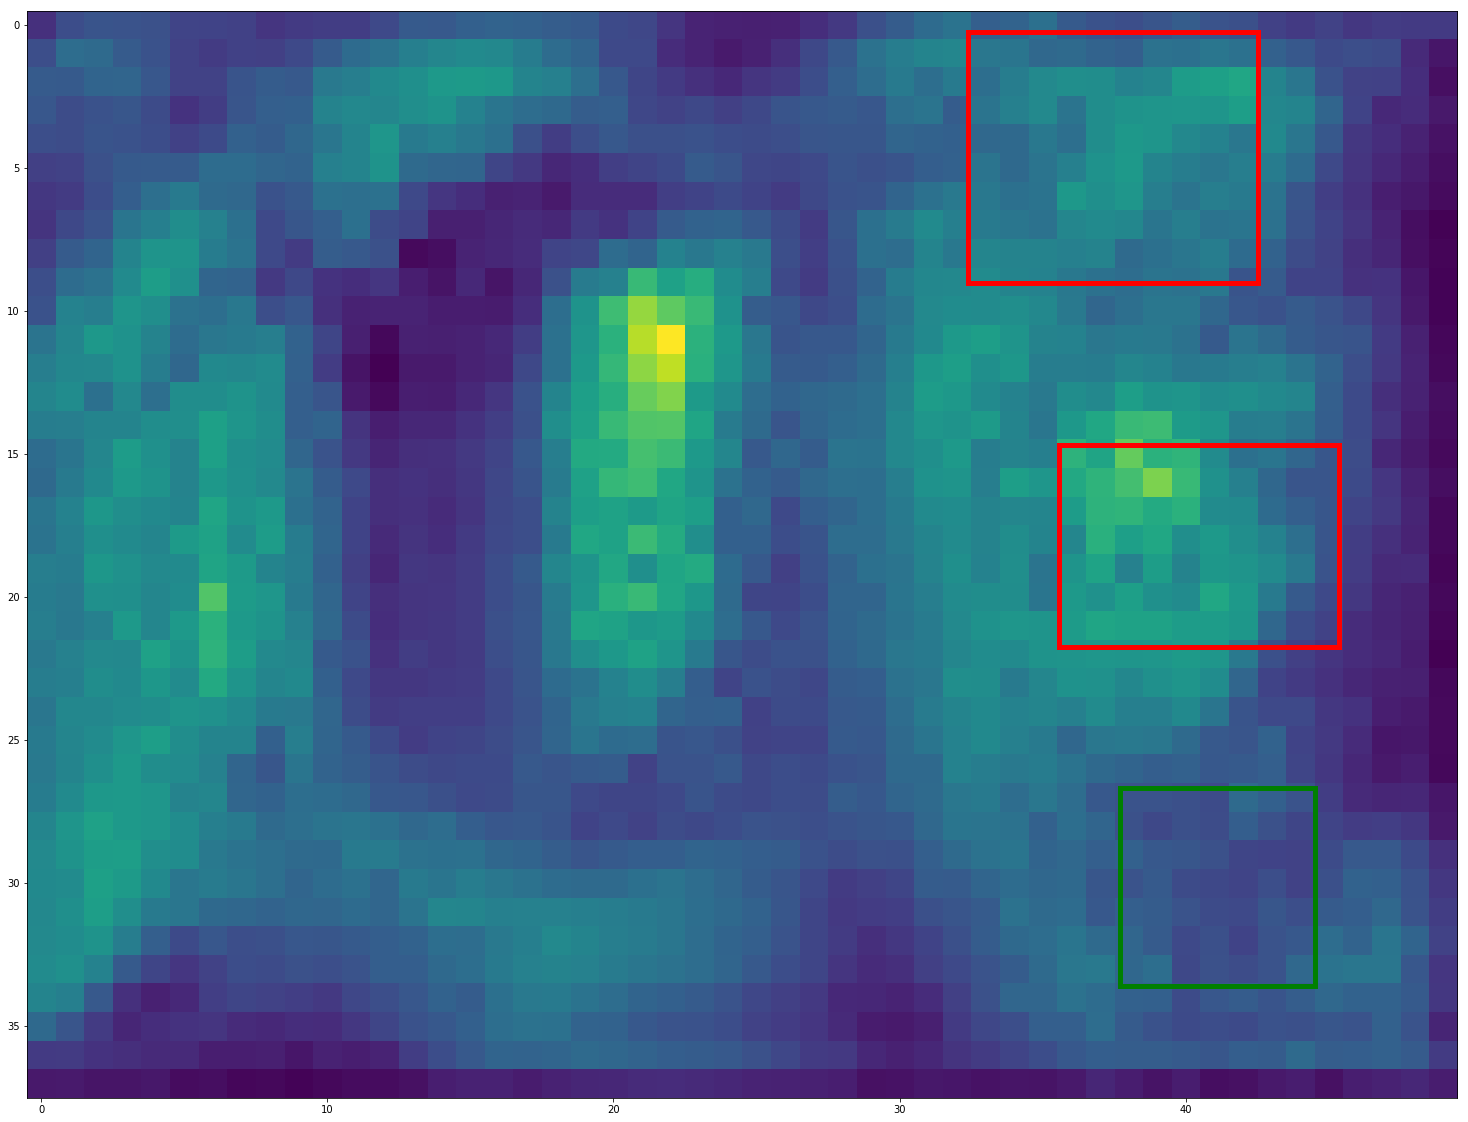

negatives


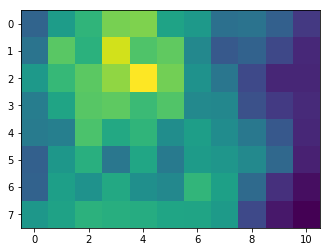

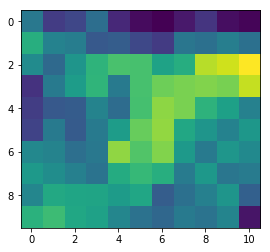

positives


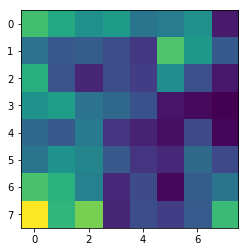

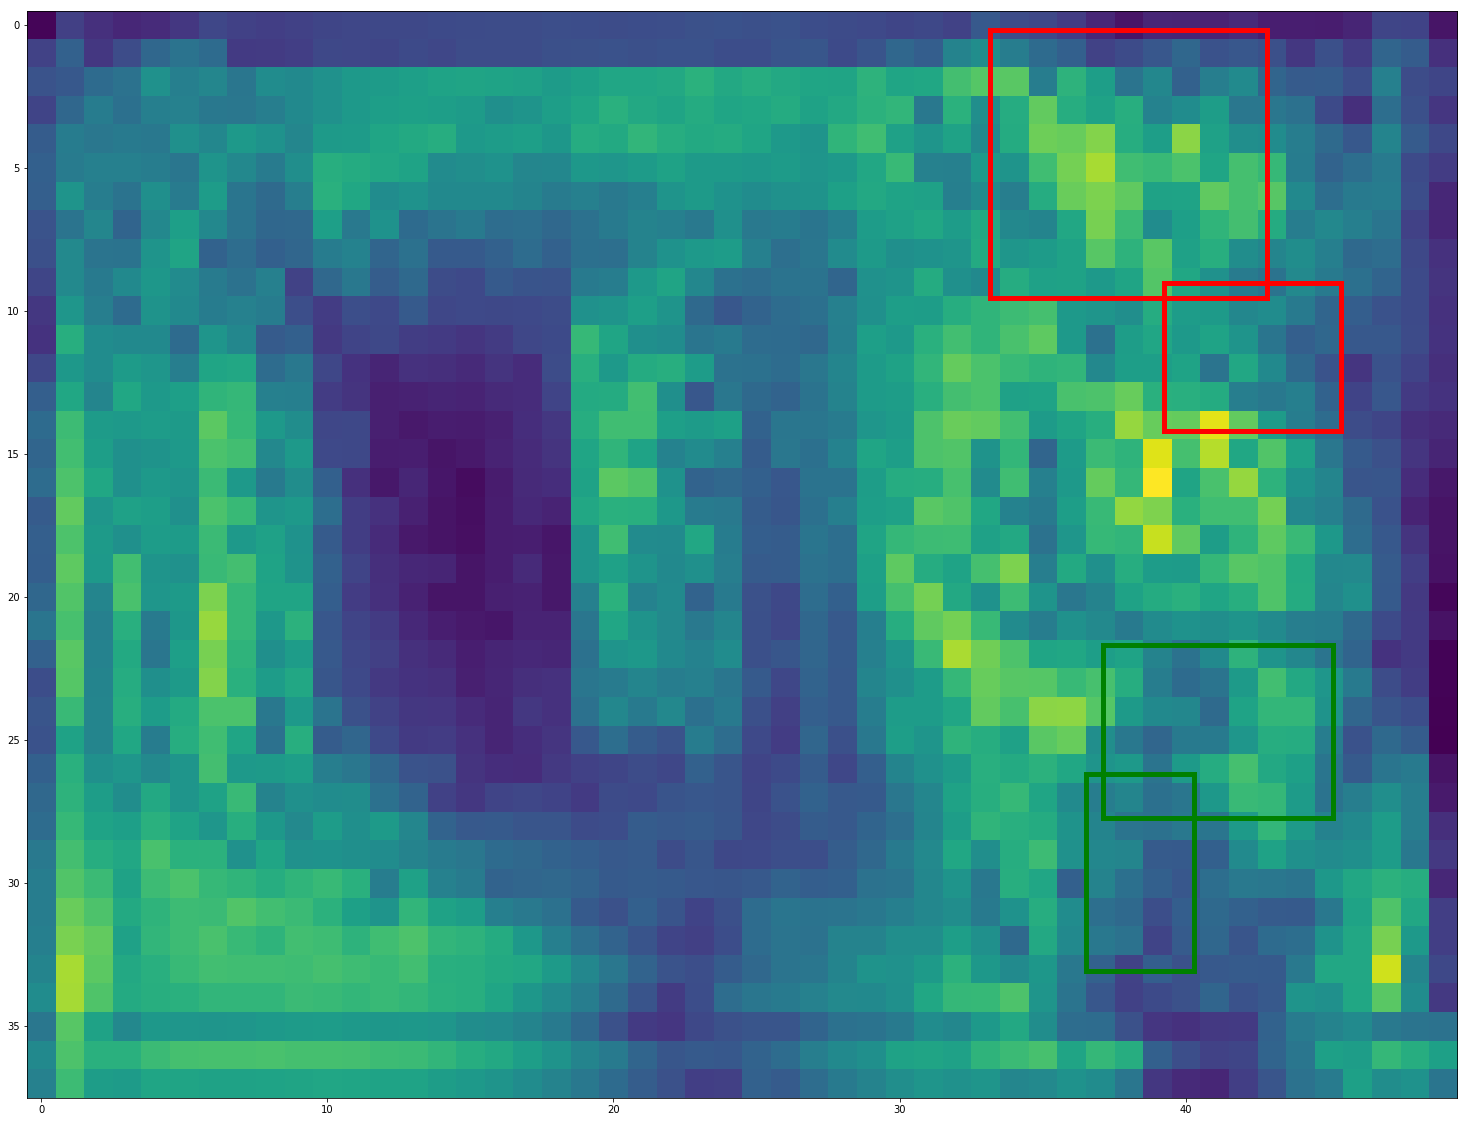

negatives


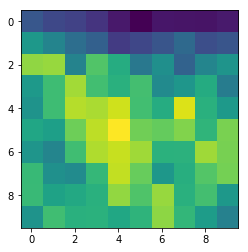

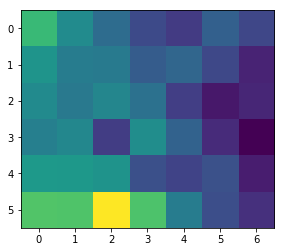

positives


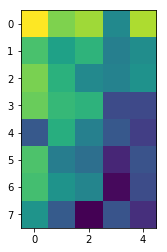

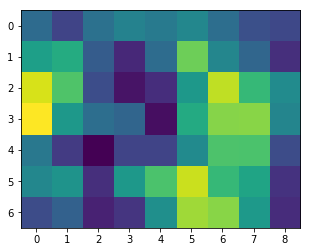

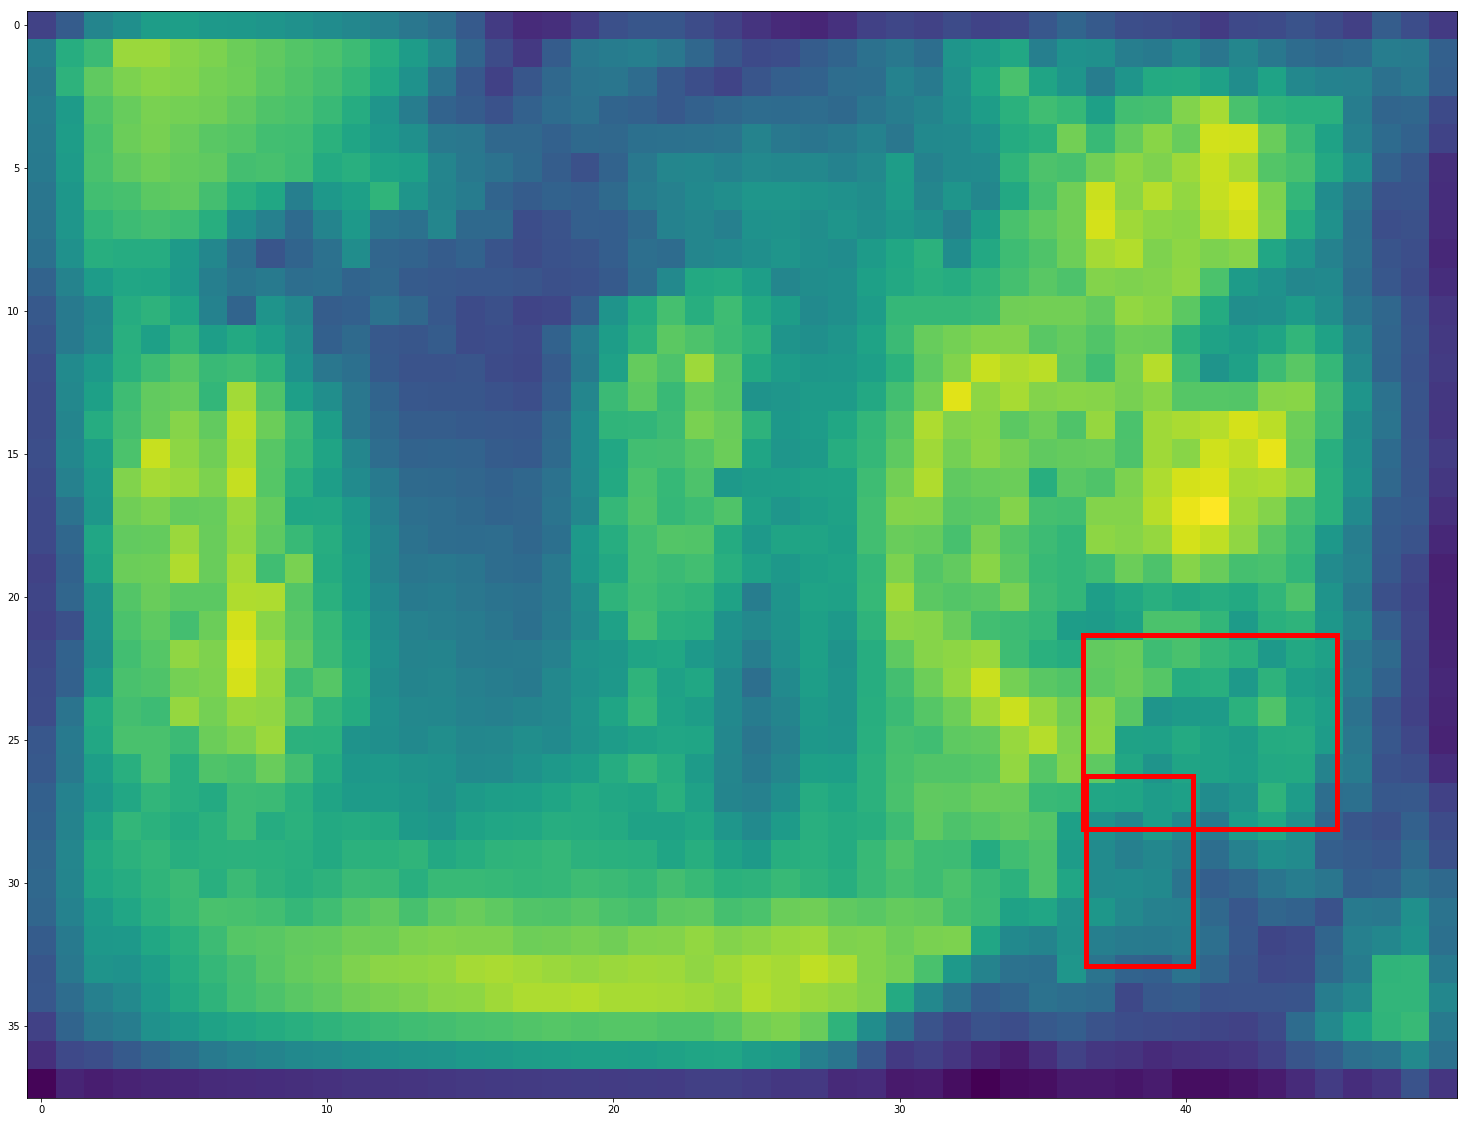

negatives


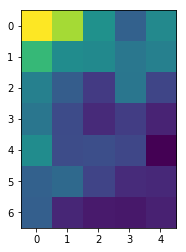

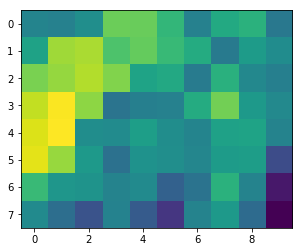

positives


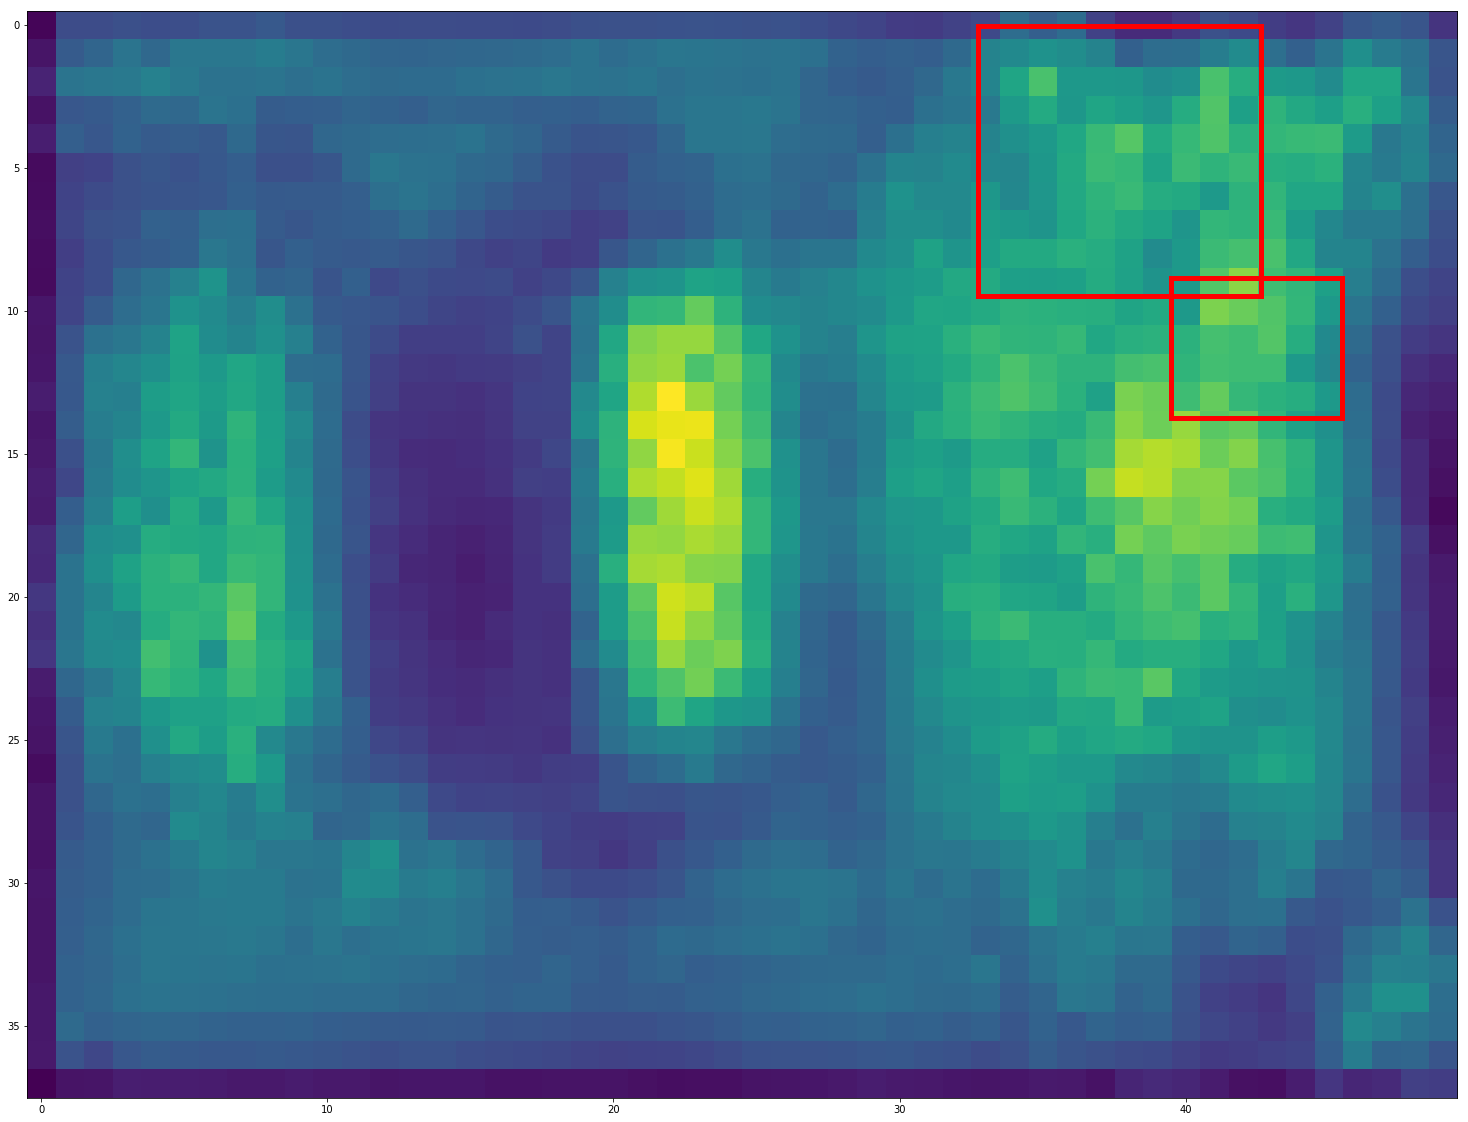

negatives


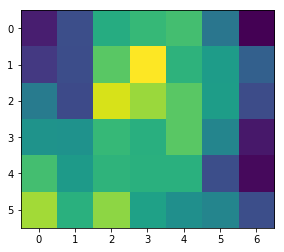

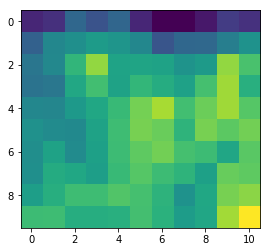

positives


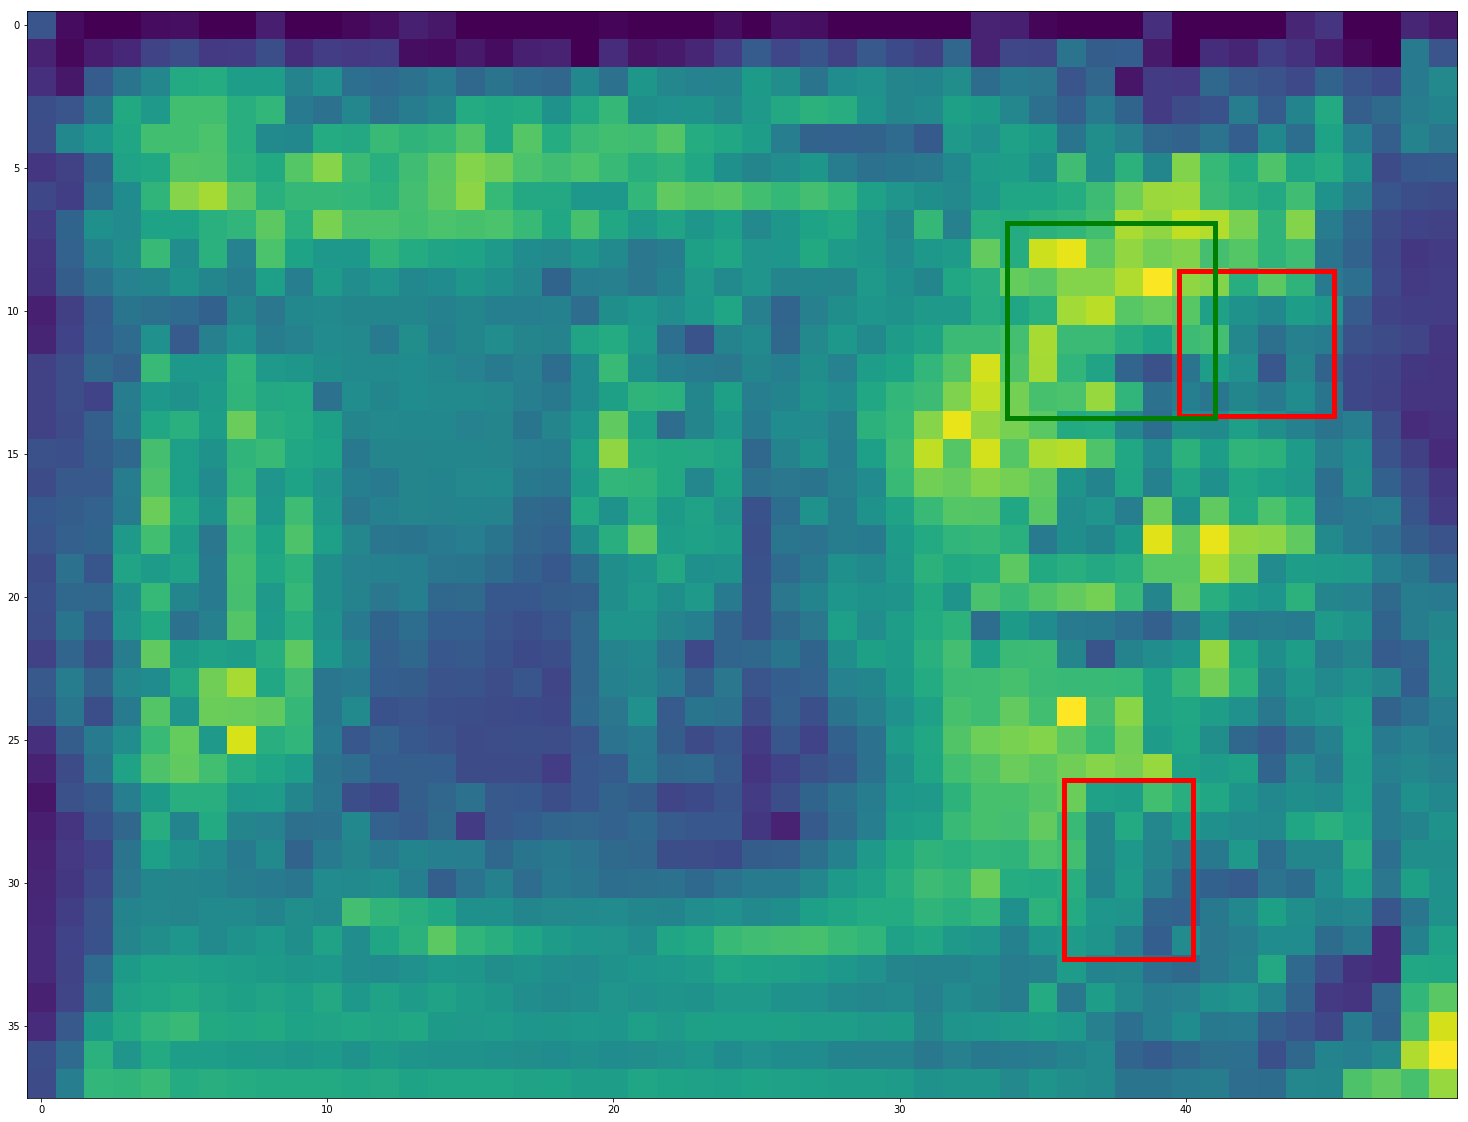

negatives


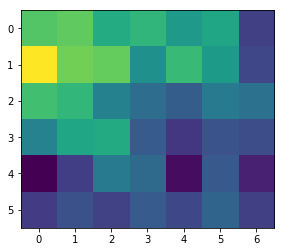

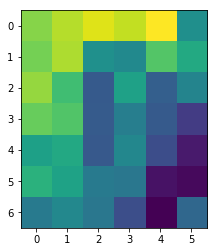

positives


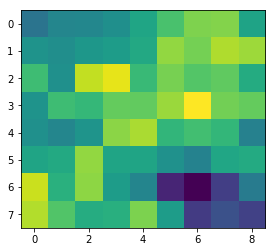

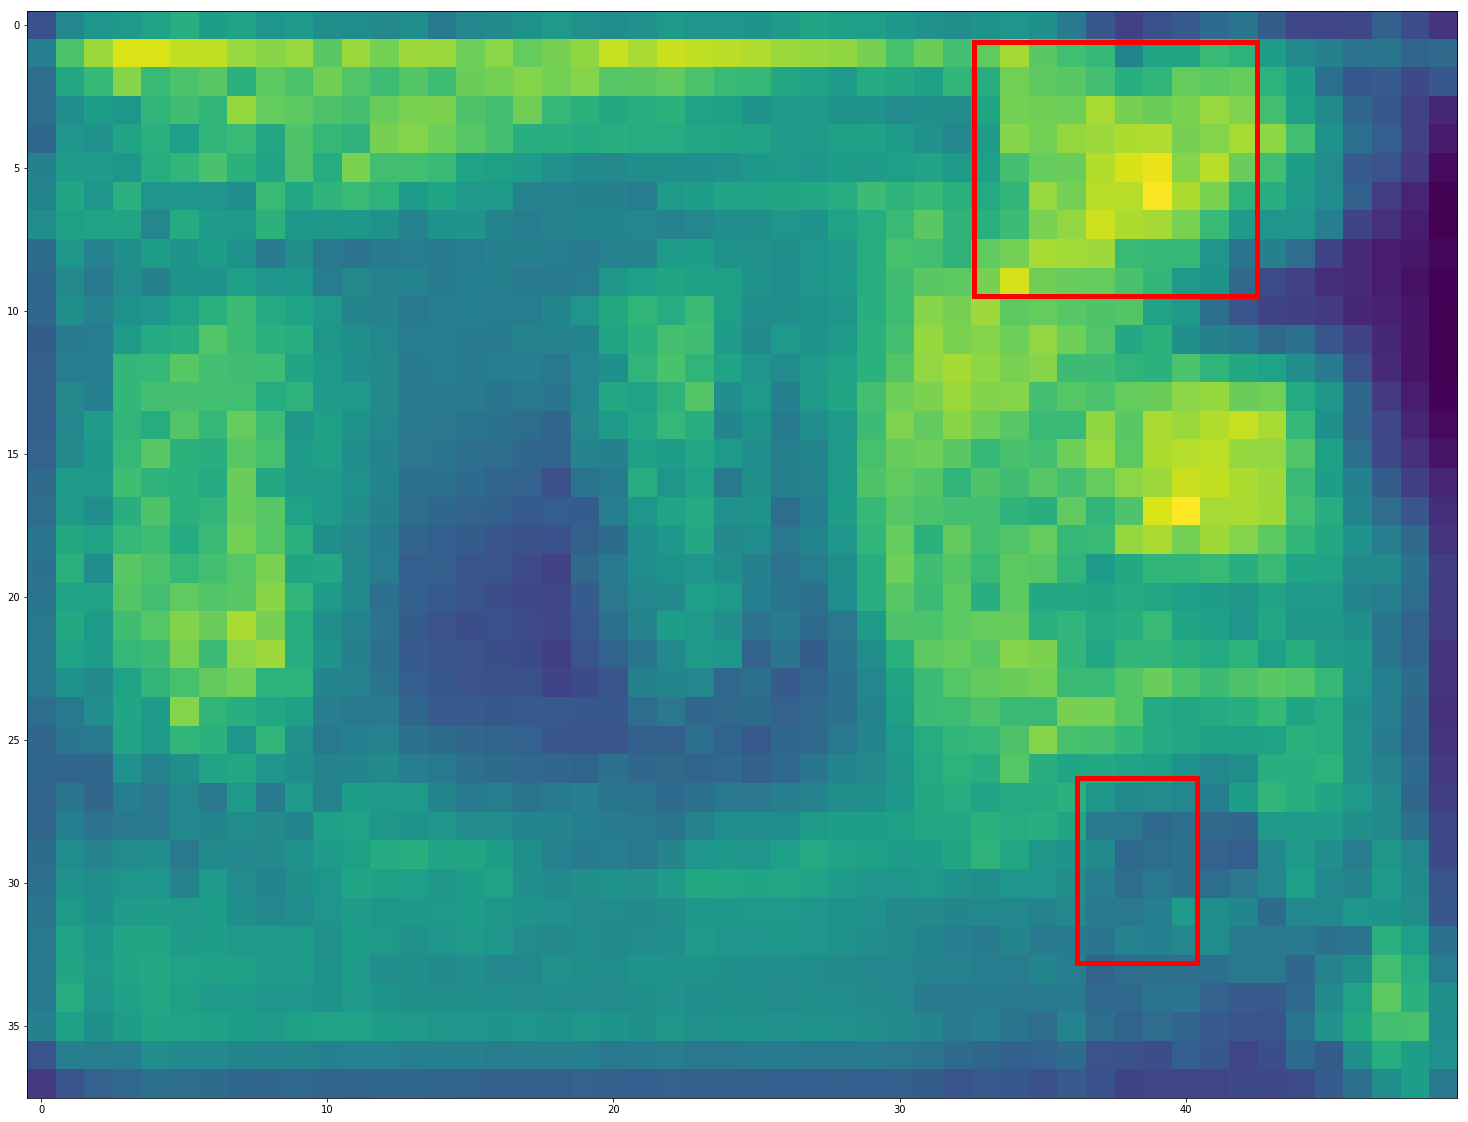

negatives


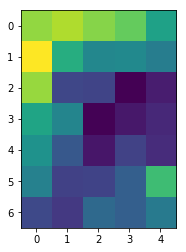

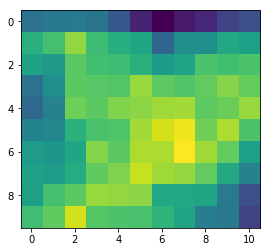

positives


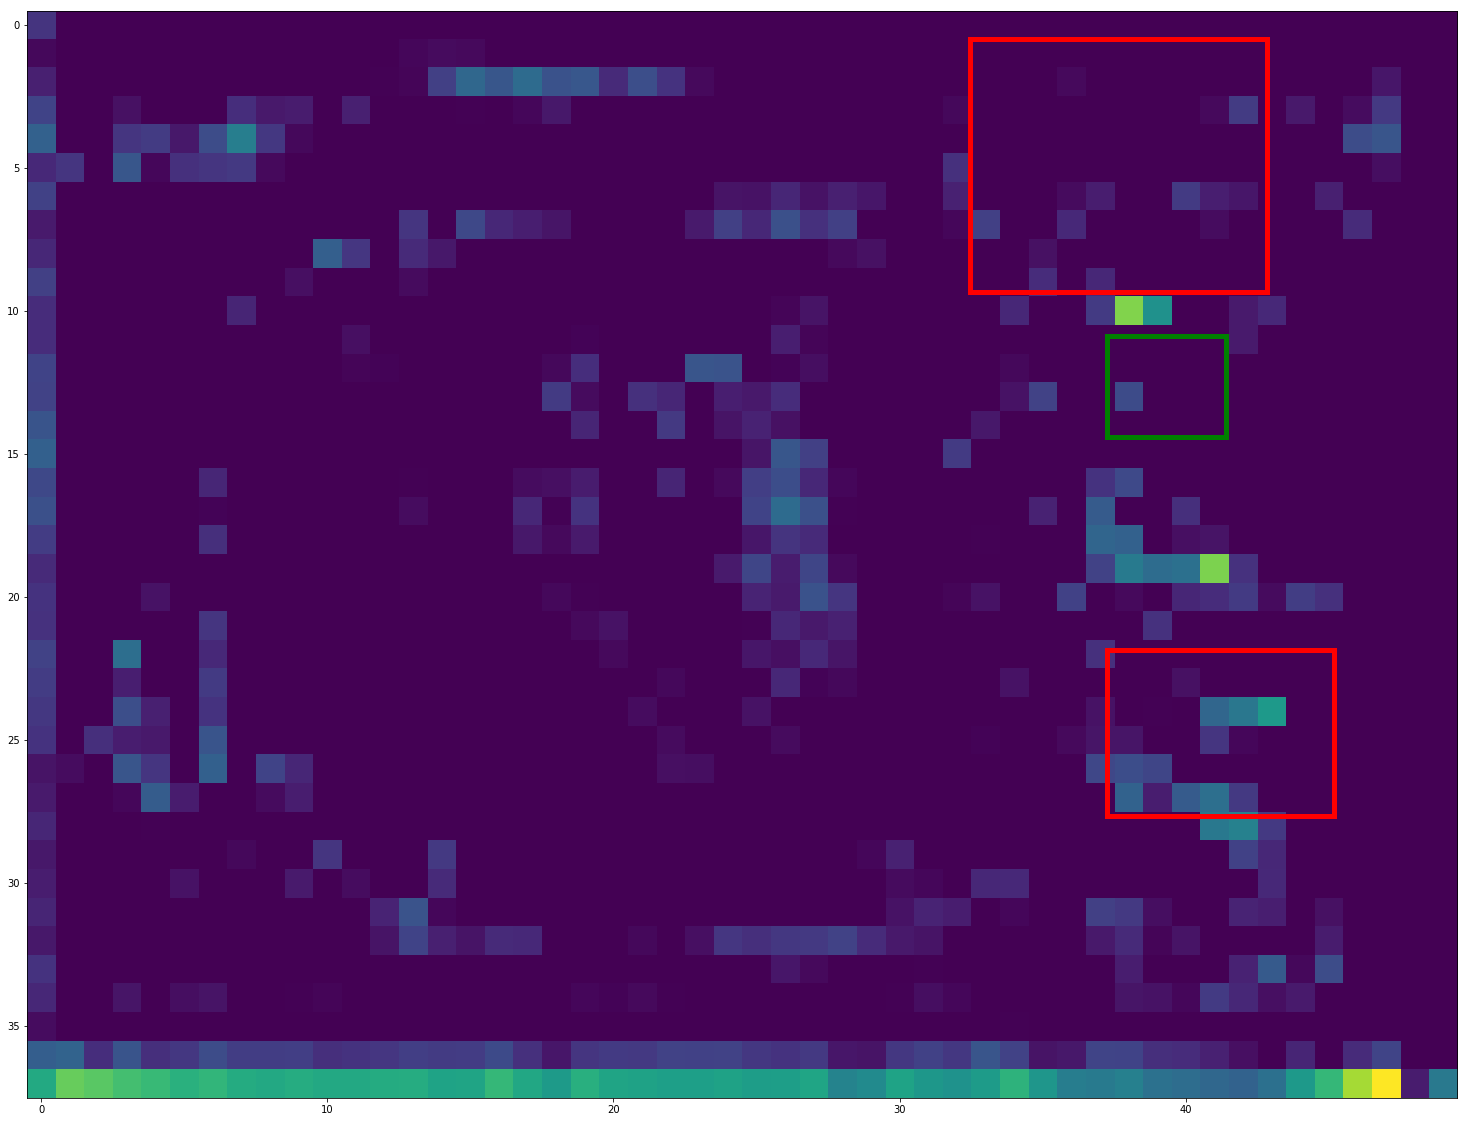

negatives


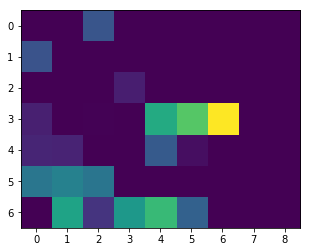

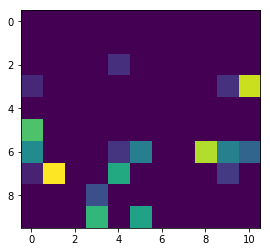

positives


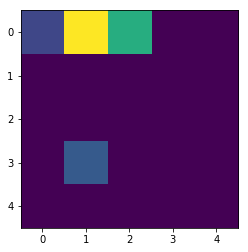

KeyboardInterrupt: 

In [7]:
for session in sorted(os.listdir(SESSIONS_PATH)):
    try:
        a = int(session)

        features_path = os.path.join(SESSIONS_PATH, session, "features")
        boxes_path = os.path.join(SESSIONS_PATH, session, "boxes")
        session_path = os.path.join(SESSIONS_PATH, session)
        if not os.path.exists(os.path.join(features_path)) or not os.path.exists(os.path.join(boxes_path)) :
            continue

        for image_file in sorted(os.listdir(session_path)):
            try:
                if not image_file.endswith(".jpg"):
                    continue
                feature_path = os.path.join(features_path, image_file + ".feature.coco")
                boxe_path = os.path.join(boxes_path, image_file + ".box")
                features = None
                boxes = None
                with open(feature_path, "rb") as f:
                    features = np.load(f)
                with open(boxe_path, "rb") as f:
                    boxes = pkl.load(f)
                
                features = features[0]
                image_np = features[:,:,500]
                image_np *= 255.0/image_np.max()  

                fig,ax = plt.subplots(1, figsize=IMAGE_SIZE)

                ax.imshow(image_np)
                for label in boxes[0]:
                    rect = patches.Rectangle(
                        (label[1]*image_np.shape[1],label[0]*image_np.shape[0]),
                        (label[3]-label[1])*image_np.shape[1],
                        (label[2]-label[0])*image_np.shape[0],
                        linewidth=5,edgecolor='r',facecolor='none')
                    ax.add_patch(rect)

                for label in boxes[1]:
                    rect = patches.Rectangle(
                        (label[1]*image_np.shape[1],label[0]*image_np.shape[0]),
                        (label[3]-label[1])*image_np.shape[1],
                        (label[2]-label[0])*image_np.shape[0],
                        linewidth=5,edgecolor='g',facecolor='none')
                    ax.add_patch(rect)
                plt.show(IMAGE_SIZE)
                
                
                print("negatives")
                for label in boxes[0]:
#                     print (
#                         floor(label[0]*image_np.shape[0]),
#                         ceil(label[2]*image_np.shape[0]),
#                         floor(label[1]*image_np.shape[1]),
#                         ceil(label[3]*image_np.shape[1]))
                    rect = features[
                        floor(label[0]*image_np.shape[0]):
                        ceil(label[2]*image_np.shape[0]), 
                        floor(label[1]*image_np.shape[1]):
                        ceil(label[3]*image_np.shape[1])]
                    fig,ax = plt.subplots(1)
                    ax.imshow(rect[:,:,500])
                    plt.show()
                    
                
                
                print("positives")
                for label in boxes[1]:
                    rect = features[
                        floor(label[0]*image_np.shape[0]):
                        ceil(label[2]*image_np.shape[0]), 
                        floor(label[1]*image_np.shape[1]):
                        ceil(label[3]*image_np.shape[1])]
                    fig,ax = plt.subplots(1)
                    ax.imshow(rect[:,:,500])
                    plt.show()
                    
                
            except Exception as ex:
                print (session, ex)
                continue
        break
    except Exception as ex:
        print (session, ex)
        continue
    

In [8]:
X = []
Y = []
for session in sorted(os.listdir(SESSIONS_PATH)):
    try:
        a = int(session)
        print(session)
        features_path = os.path.join(SESSIONS_PATH, session, "features")
        boxes_path = os.path.join(SESSIONS_PATH, session, "boxes")
        session_path = os.path.join(SESSIONS_PATH, session)
        if not os.path.exists(os.path.join(features_path)) or not os.path.exists(os.path.join(boxes_path)) :
            continue
        previous_features = None
        previous_boxes = None
        for image_file in sorted(os.listdir(session_path)):
            try:
                if not image_file.endswith(".jpg"):
                    continue
                feature_path = os.path.join(features_path, image_file + ".feature.coco")
                boxe_path = os.path.join(boxes_path, image_file + ".box")
                features = None
                boxes = None
                with open(feature_path, "rb") as f:
                    features = np.load(f)[0]
                with open(boxe_path, "rb") as f:
                    boxes = pkl.load(f)
                
                
                if previous_features is not None:
                    for label in boxes[0]:
                        box_prev = previous_features[
                            floor(label[0]*previous_features.shape[0]):
                            ceil(label[2]*previous_features.shape[0]), 
                            floor(label[1]*previous_features.shape[1]):
                            ceil(label[3]*previous_features.shape[1]),:]
                        box_cur = features[
                            floor(label[0]*features.shape[0]):
                            ceil(label[2]*features.shape[0]), 
                            floor(label[1]*features.shape[1]):
                            ceil(label[3]*features.shape[1]),:]
                        
                        max_pooled = get_max_and_concat(box_prev, box_cur)
                        X.append(max_pooled)
                        Y.append(0)

                    for label in boxes[1]:
                        if(label[4] == "add"):
                            box_prev = previous_features[
                                floor(label[0]*previous_features.shape[0]):
                                ceil(label[2]*previous_features.shape[0]), 
                                floor(label[1]*previous_features.shape[1]):
                                ceil(label[3]*previous_features.shape[1]),:]
                            box_cur = features[
                                floor(label[0]*features.shape[0]):
                                ceil(label[2]*features.shape[0]), 
                                floor(label[1]*features.shape[1]):
                                ceil(label[3]*features.shape[1]),:]

                            max_pooled = get_max_and_concat(box_prev, box_cur)
                            X.append(max_pooled)
                            Y.append(1)
                            
                    for label in previous_boxes[1]:
                        if(label[4] == "remove"):
                            box_prev = previous_features[
                                floor(label[0]*previous_features.shape[0]):
                                ceil(label[2]*previous_features.shape[0]), 
                                floor(label[1]*previous_features.shape[1]):
                                ceil(label[3]*previous_features.shape[1]),:]
                            box_cur = features[
                                floor(label[0]*features.shape[0]):
                                ceil(label[2]*features.shape[0]), 
                                floor(label[1]*features.shape[1]):
                                ceil(label[3]*features.shape[1]),:]

                            max_pooled = get_max_and_concat(box_cur, box_prev)
                            X.append(max_pooled)
                            Y.append(1)
                        
                previous_features = features
                previous_boxes = boxes
                
            except Exception as ex:
                print (session, ex)
    except Exception as ex:
        print (session, ex)
    

117653
117684
117687
118828
118859
118863
118885
122847
122848
122849
122854
122858
122860
122861
122862
122868
122873
122874
122880
122887
122890
122892
122896
122901
122903
122909
122915
122917
122921
122923_testing invalid literal for int() with base 10: '122923_testing'
122931
122932
122933
122938
122943
122945
122946
122949
122953
122954
122959
122961
122962
122963
122967
122970
122973
122975
122979
122992
122997
123003
123004
123010
123016
123021
123027
123028
123034
123041
123049
123051
123054
123071
123074
123082
123084
123089
123092
123097
123100
123104
123113
123114
123120
123123
123132
123136
123137
123152
123153
123156
123161
123164
123166
123171
123172
123176
123178
123179
123185
123213
123216
123221
123225
123229
123234
123234 cannot reshape array of size 1772512 into shape (1,38,50,1024)
123238
123256
123262
123271
123272
123281
123282
123288
123291
123292
123296
123300
123303
123307
123312
123329
123330
123345
123355
123356
123358
123360
123372
123374
123375
123379
1233

In [9]:
X = np.asarray(X)
Y = np.asarray(Y)

In [10]:
import pickle as pkl

with open(SESSIONS_PATH + "/dataset.pkl", "wb") as f:
    pkl.dump([X, Y], f)

In [ ]:
Y.shape